# This notebook is meant for Exploratory Data Analysis - getting a feel for the data

### Importing the necessary libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset and creating sub-dataframes based on loan default status
df = pd.read_csv("../data/raw/Loan_Default.csv")
df_default = df[df["Status"] == 1]
df_non_default = df[df["Status"] == 0]

In [4]:
# Quick overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
# Basic statistics of the data
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


## Checking for missing values

In [14]:
p_missing = round(df.isnull().sum() * 100 / len(df), 2)
p_missing_default = round(df_default.isnull().sum() * 100 / len(df_default), 2)
p_missing_non_default = round(df_non_default.isnull().sum() * 100 / len(df_non_default), 2)

# Percentage of missing values in the dataset
missing_values = pd.DataFrame({"Columns": df.columns, "Total": p_missing, "Default": p_missing_default, "Non-Default": p_missing_non_default})

missing_values.sort_values(by="Total", inplace = True, ascending=False)

missing_values

,Columns,Total,Default,Non-Default
Upfront_charges,Upfront_charges,26.66,99.58,2.82
Interest_rate_spread,Interest_rate_spread,24.64,100.00,0.00
rate_of_interest,rate_of_interest,24.51,99.45,0.00
dtir1,dtir1,16.22,44.52,6.97
LTV,LTV,10.16,41.20,0.00
property_value,property_value,10.16,41.20,0.00
income,income,6.15,3.38,7.06
loan_limit,loan_limit,2.25,2.40,2.20
approv_in_adv,approv_in_adv,0.61,0.66,0.60
submission_of_application,submission_of_application,0.13,0.55,0.00


##### Observations: 
##### The columns "Upfront_charges", "Interest_rate_spread", and "rate_of_interest" have almost 100% missing values when the borrower has defaulted on the loan. 
##### As these values will not add much signifinace when training the model, the columns will be dropped. 

## Predictors with predominant values

In [54]:
categorical_comuns = ["loan_limit", "Gender", "approv_in_adv", "loan_type", "loan_purpose", "Credit_Worthiness","open_credit", "business_or_commercial",
               "term", "Neg_ammortization", "interest_only", "lump_sum_payment", "construction_type","occupancy_type", "Secured_by", "total_units",
               "credit_type", "co-applicant_credit_type", "age","submission_of_application", "Region", "Security_Type"] 
numerical_columns = ["loan_amount", "rate_of_interest","Interest_rate_spread","Upfront_charges","property_value", "Credit_Score","income", "LTV", "dtir1"]


print("Categorical columns: ")
# Categorical columns with 95% of the same value are not useful for the model
for column in categorical_comuns:
    col = round(df[column].value_counts(normalize = True)*100,2).to_frame().reset_index()
    first_value = col.proportion[0]
    if first_value > 95:
        print("Column: ", column, " - ", first_value, "%", "of the values are: ", col[column][0])

print("\nNumerical columns: ")
# Numerical columns with 10% of the same value are not useful for the model
for column in numerical_columns:
    col = round(df[column].value_counts(normalize = True)*100,2).to_frame().reset_index()
    first_value = col.proportion[0]
    if first_value > 10:
        print("Column: ", column, " - ", first_value, "%", "of the values are: ", col[column][0])

Categorical columns: 
Column:  Credit_Worthiness  -  95.74 % of the values are:  l1
Column:  open_credit  -  99.63 % of the values are:  nopc
Column:  interest_only  -  95.22 % of the values are:  not_int
Column:  lump_sum_payment  -  97.72 % of the values are:  not_lpsm
Column:  construction_type  -  99.98 % of the values are:  sb
Column:  Secured_by  -  99.98 % of the values are:  home
Column:  total_units  -  98.53 % of the values are:  1U
Column:  Security_Type  -  99.98 % of the values are:  direct

Numerical columns: 
Column:  rate_of_interest  -  12.88 % of the values are:  3.99
Column:  Upfront_charges  -  19.05 % of the values are:  0.0


##### All the columns printed above will be dropped

### Checking for Quasi-complete separation

loan_limit


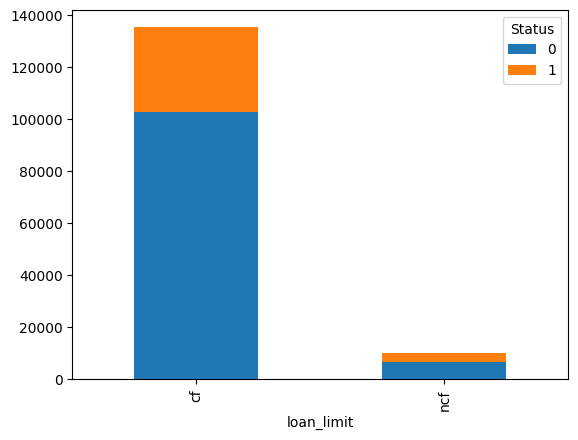

Gender


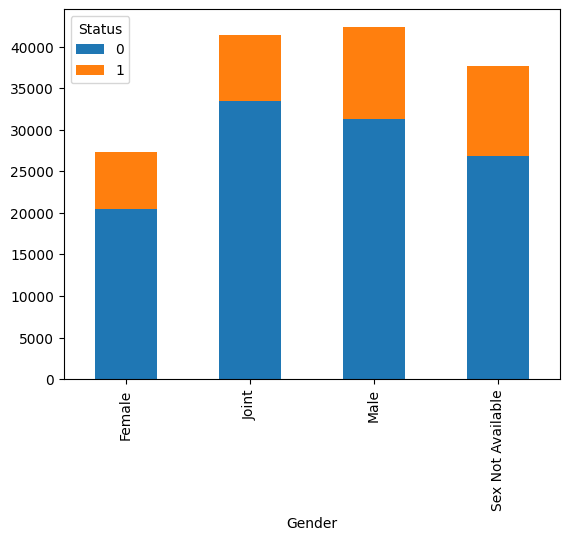

approv_in_adv


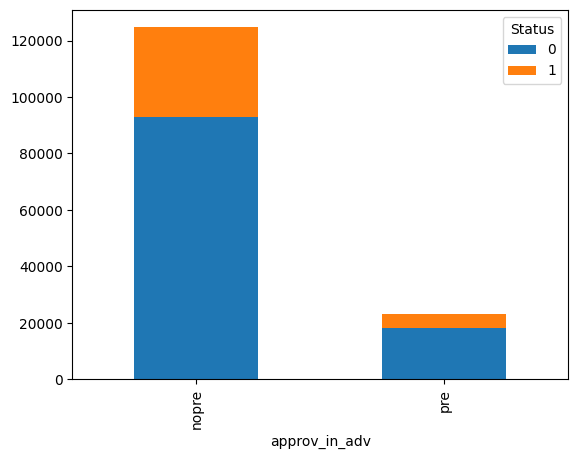

loan_type


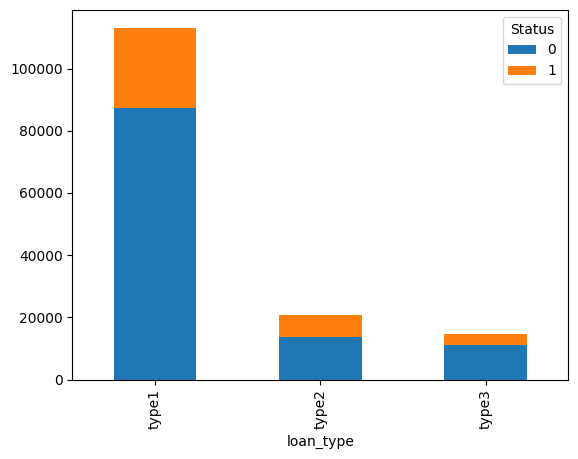

loan_purpose


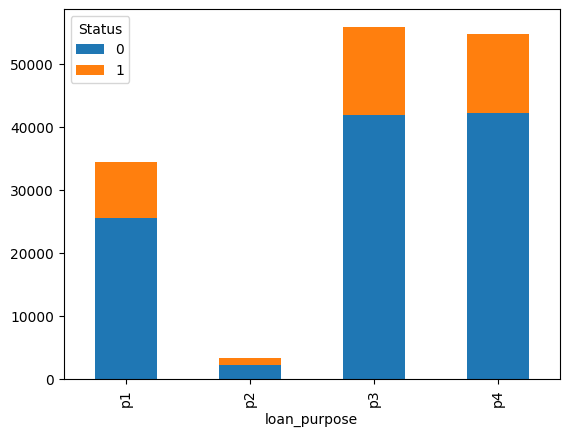

Credit_Worthiness


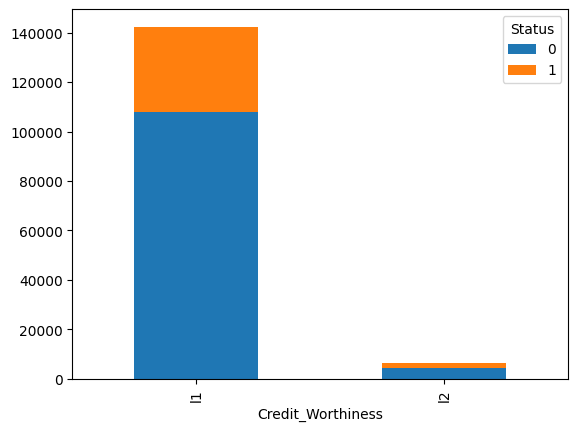

open_credit


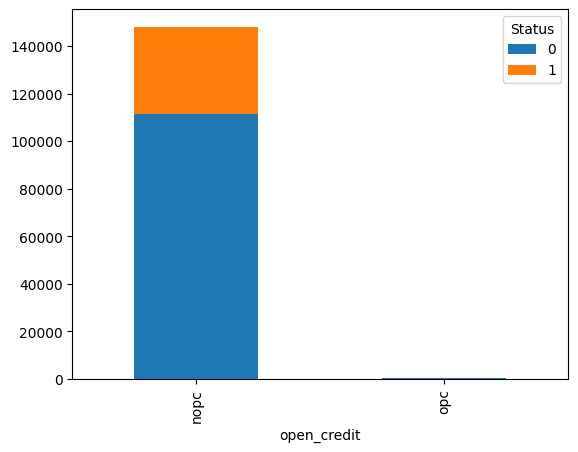

business_or_commercial


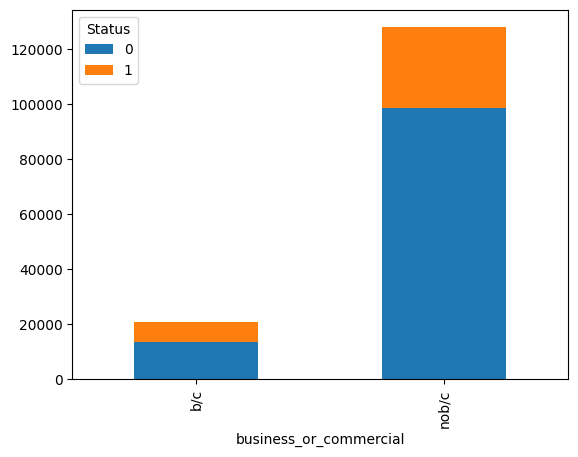

Neg_ammortization


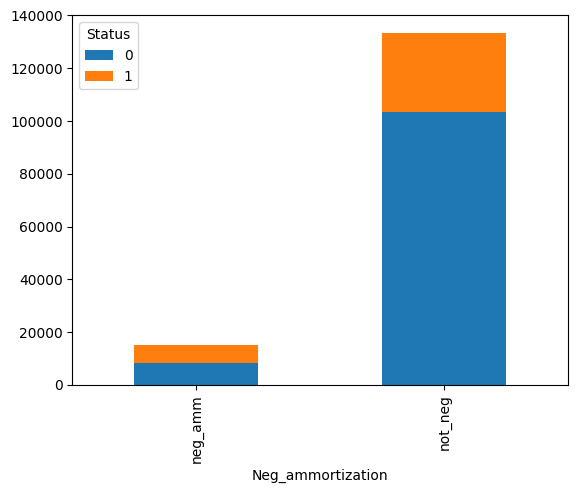

interest_only


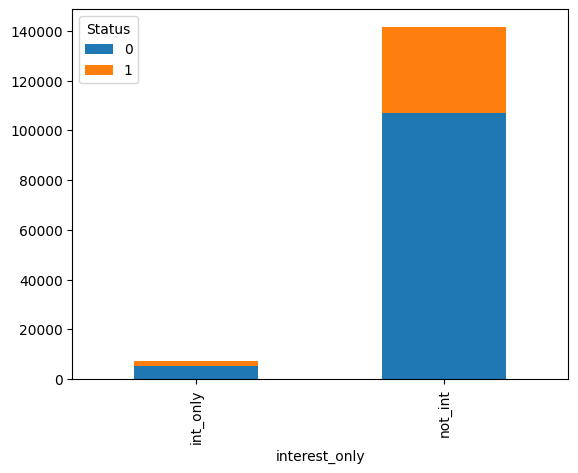

lump_sum_payment


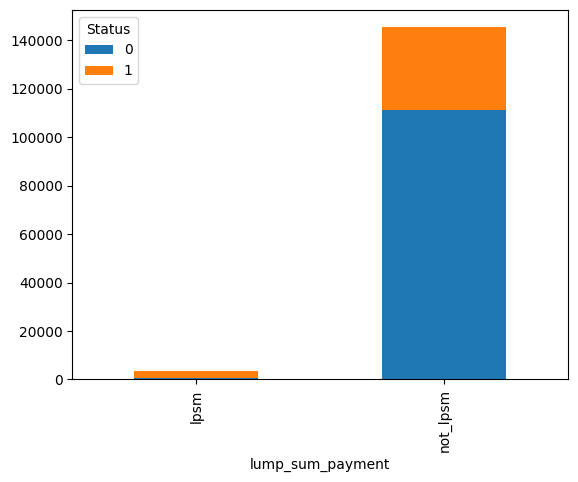

construction_type


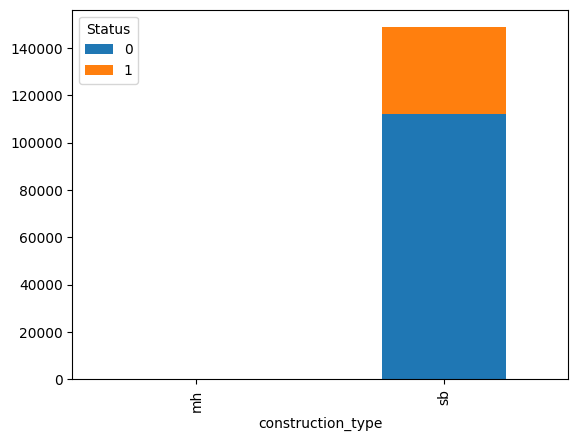

occupancy_type


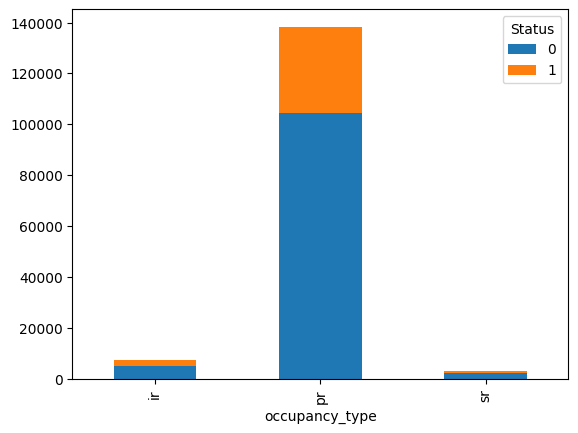

Secured_by


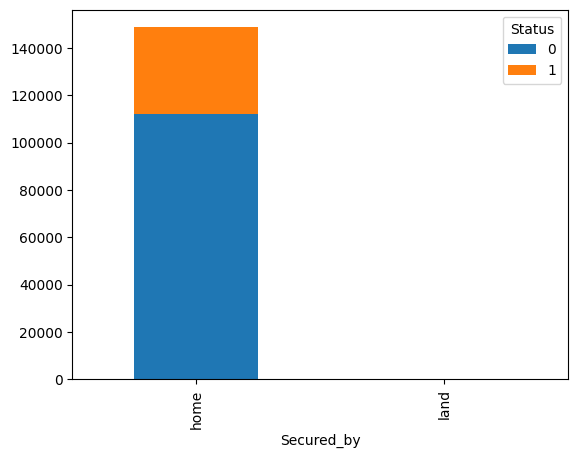

total_units


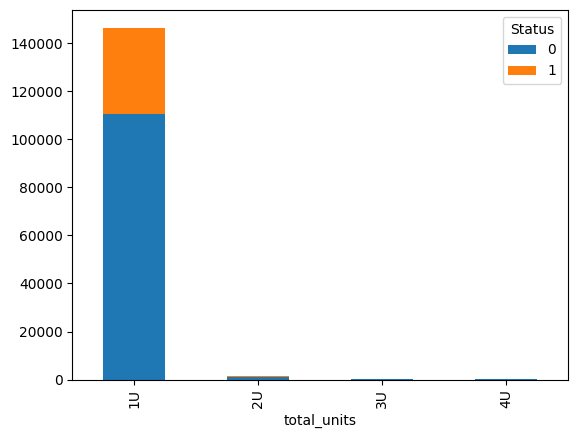

credit_type


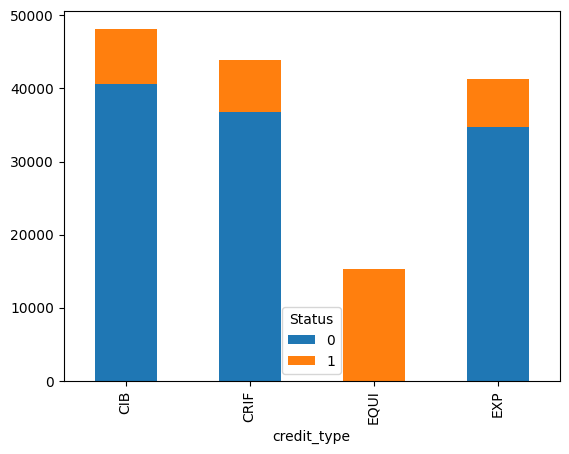

co-applicant_credit_type


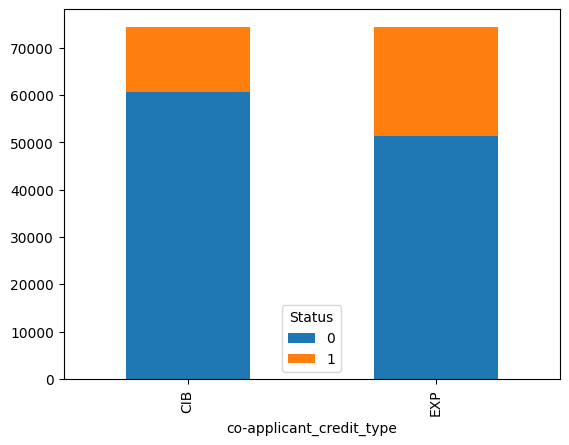

age


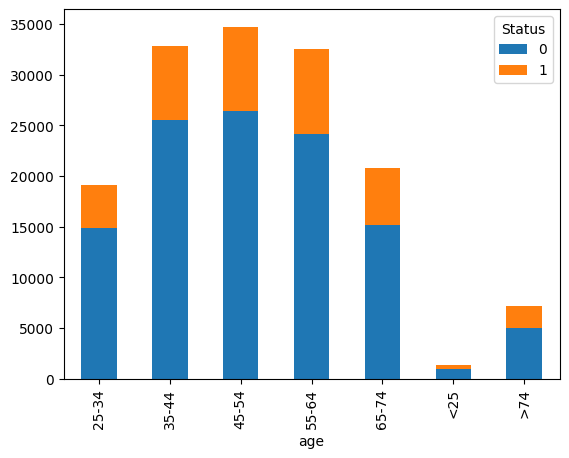

submission_of_application


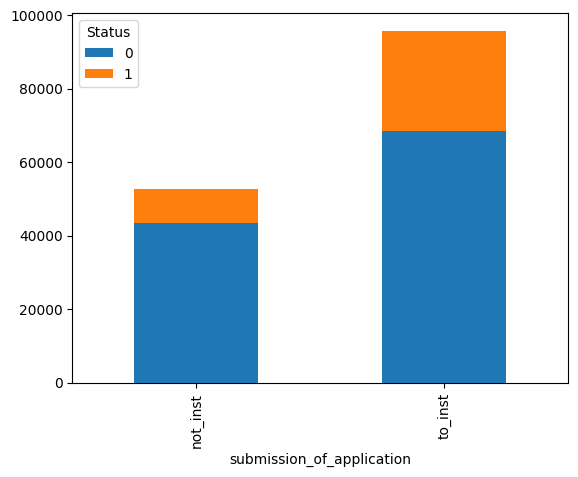

Region


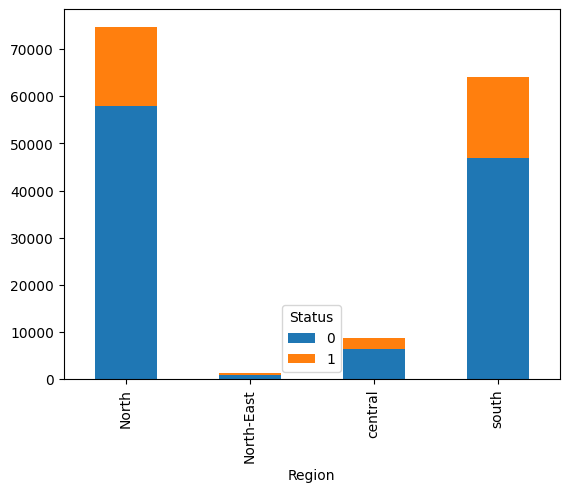

Security_Type


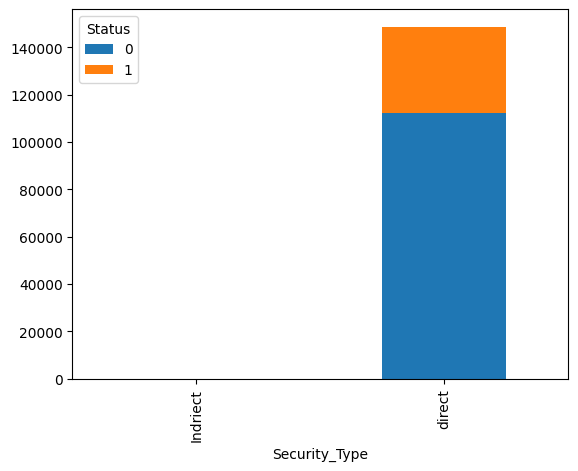

In [66]:
for x in df.columns:
    if x == "ID" or x == "year" or x == "Status":
        continue
    else:
        if df[x].unique().size < 10:
            print(x)
            groupby_df = df.groupby(["Status", x])[x].count().unstack(level=0)
            groupby_df.plot(kind='bar', stacked=True)
            plt.set_cmap(cmap='coolwarm')
            plt.show()

##### The columns "open_credit", "construction_type", "secured_by", "total_units", and "security_type" show that the there is one dominating predictor value, hence these columns will be dropped

### Checking for correlation for numerical variables

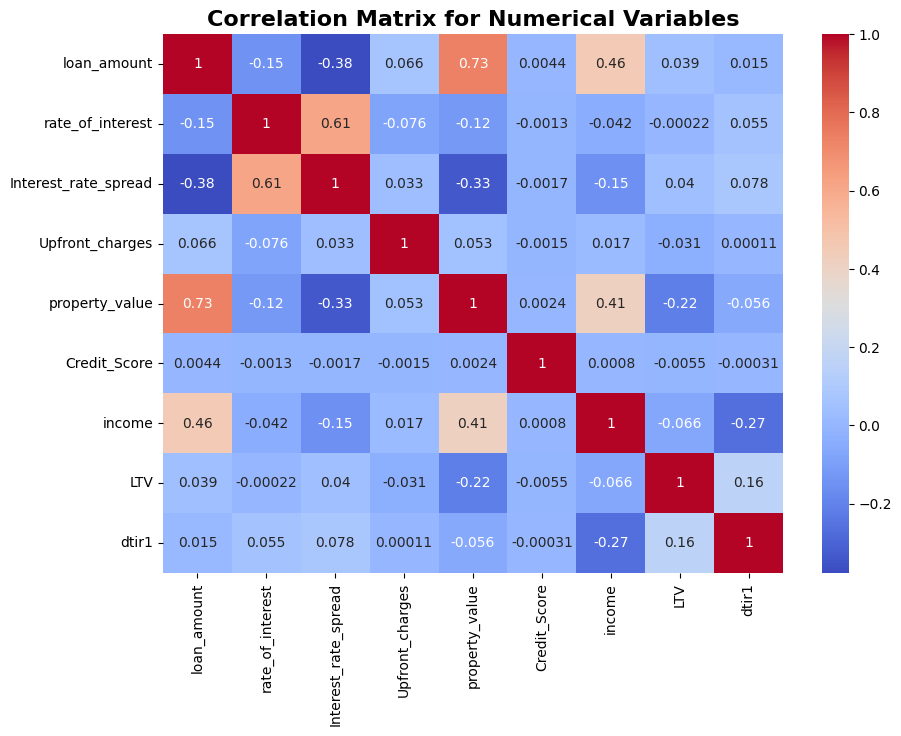

In [92]:
num_df = df[numerical_columns]
correlation_matrix = num_df.corr()
plt.figure(figsize=(10,7))
plt.title("Correlation Matrix for Numerical Variables", fontsize=16, fontweight="bold")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

##### The above heatmap suggests that no significant correlation is observed between the numerical variables (threshold considered is +/- 0.85)